In [ ]:
#importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

# Load the "Bankruptcy_Detection" dataset
data = pd.read_csv("/content/data.csv")

In [ ]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1.0,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1.0,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1.0,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1.0,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1.0,0.035490


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 3129 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  3129 non-null   float64
 2    ROA(A) before interest and % after tax                   3129 non-null   float64
 3    ROA(B) before interest and depreciation after tax        3129 non-null   float64
 4    Operating Gross Margin                                   3129 non-null   float64
 5    Realized Sales Gross Margin                              3129 non-null   float64
 6    Operating Profit Rate                                    3129 non-null   float64
 7    Pre-tax net Interest Rate                                3129 non-null   float64
 8    After-tax net Int

In [ ]:
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        1
 Degree of Financial Leverage (DFL)                         1
 Interest Coverage Ratio (Interest expense to EBIT)         1
 Net Income Flag                                            1
 Equity to Liability                                        1
Length: 96, dtype: int64

In [ ]:
# Fill null values with the mean of each column
data.fillna(data.mean(), inplace=True)

In [ ]:
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [ ]:
# Separate features (X) and labels (y) from the dataset
X = data.drop("Bankrupt?", axis=1)
y = data["Bankrupt?"]


In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Standardize the feature data to have zero mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



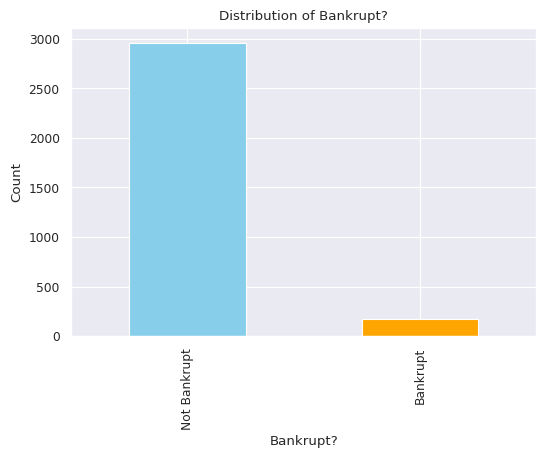

In [ ]:
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable "Bankrupt?"
plt.figure(figsize=(6, 4))
data["Bankrupt?"].value_counts().plot(kind="bar", color=["skyblue", "orange"])
plt.xlabel("Bankrupt?")
plt.ylabel("Count")
plt.title("Distribution of Bankrupt?")
plt.xticks([0, 1], ["Not Bankrupt", "Bankrupt"])
plt.show()


In [ ]:
# Handling class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)



In [ ]:
# Handling class imbalance using Random Under-Sampling
rus = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = rus.fit_resample(X_train_balanced, y_train_balanced)



In [ ]:
# Create a Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier on the balanced training data
random_forest.fit(X_train_balanced, y_train_balanced)

# Create an SVM classifier
svm_model = SVC(random_state=42)

# Train the SVM classifier on the balanced training data
svm_model.fit(X_train_balanced, y_train_balanced)



SVC(random_state=42)

In [ ]:
# Use the trained models to make predictions on the test data
y_pred_rf = random_forest.predict(X_test_scaled)
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the performance of the models
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

classification_rep_rf = classification_report(y_test, y_pred_rf)
classification_rep_svm = classification_report(y_test, y_pred_svm)



In [ ]:
# Print the results
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_rep_rf)

print("\nSVM Classifier Results:")
print("Accuracy:", accuracy_svm)
print("Classification Report:")
print(classification_rep_svm)


Random Forest Classifier Results:
Accuracy: 0.9169329073482428
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       592
           1       0.30      0.38      0.33        34

    accuracy                           0.92       626
   macro avg       0.63      0.66      0.64       626
weighted avg       0.93      0.92      0.92       626


SVM Classifier Results:
Accuracy: 0.8817891373801917
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.93       592
           1       0.26      0.65      0.37        34

    accuracy                           0.88       626
   macro avg       0.62      0.77      0.65       626
weighted avg       0.94      0.88      0.90       626



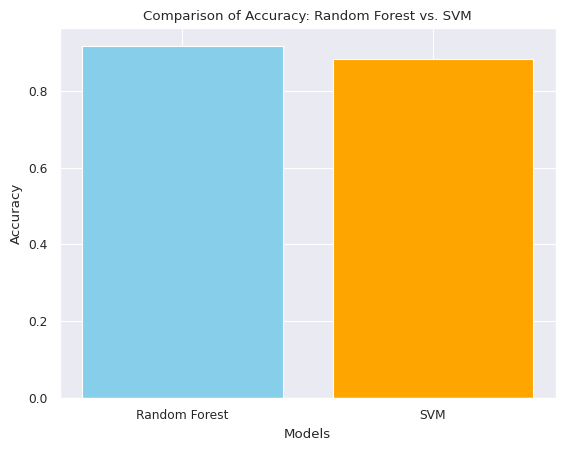

In [ ]:
# Create a bar plot to compare the accuracy of Random Forest and SVM
accuracies = [accuracy_rf, accuracy_svm]
models = ['Random Forest', 'SVM']

plt.bar(models, accuracies, color=['skyblue', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy: Random Forest vs. SVM')
plt.show()